# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

# Descriptive Statistics

In [2]:
students_df = pd.read_csv('StudentsPerformance.csv')

In [3]:
students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
students_df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [6]:
students_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Data Processing

In [7]:
students_df.rename(columns={'gender': 'Gender', 
                   'race/ethnicity': 'Race', 
                   'parental level of education': 'Parental Level of Education',
                   'lunch': 'Lunch',
                   'test preparation course': 'Test Preparation Course',
                   'math score': 'Math Score',
                   'reading score': 'Reading Score',
                   'writing score': 'Writing Score',}, inplace=True)

In [8]:
students_df["Gender"].replace({"male": "Male", "female": "Female"}, inplace=True)
students_df["Race"].replace({"group A": "Group A", "group B": "Group B",
                                  "group C": "Group C","group D": "Group D",
                                  "group E": "Group E"}, inplace=True)
students_df["Parental Level of Education"].replace({"some college": "Some College", 
                                                    "associate's degree": "Associate's Degree",
                                                    "high school": "High School",
                                                    "some high school": "Some High School",
                                                    "bachelor's degree": "Bachelor's Degree",
                                                    "master's degree": "Master's Degree"}, inplace=True)
students_df["Lunch"].replace({"standard": "Standard", "free/reduced": "Free/Reduced"}, inplace=True)
students_df["Test Preparation Course"].replace({"none": "None", "completed": "Completed"}, inplace=True)

In [9]:
grades_mapper = {'A': 90, 'B': 80, 'C': 70, 'D': 60}

def calc_usa_gpa(score):
    for grade, threshold in grades_mapper.items():
        if score >= threshold:
            return grade
    return 'F'
    
students_df["Math GPA"] = students_df.apply(lambda x : calc_usa_gpa(x["Math Score"]), axis=1)
students_df["Reading GPA"] = students_df.apply(lambda x : calc_usa_gpa(x["Reading Score"]), axis=1)
students_df["Writing GPA"] = students_df.apply(lambda x : calc_usa_gpa(x["Writing Score"]), axis=1)

In [10]:
def get_exams_passed(student):
    passed = 0
    for grade in ["Math GPA", "Reading GPA", "Writing GPA"]:
        if student[grade] < 'F':
            passed += 1
    return passed

students_df["Exams Passed"] = students_df.apply(lambda x : get_exams_passed(x), axis=1)

In [11]:
students_df[["Math Score", "Math GPA", "Reading Score", "Reading GPA", "Writing Score", "Writing GPA", "Exams Passed"]].head()

,Math Score,Math GPA,Reading Score,Reading GPA,Writing Score,Writing GPA,Exams Passed
0,72,C,72,C,74,C,3
1,69,D,90,A,88,B,3
2,90,A,95,A,93,A,3
3,47,F,57,F,44,F,0
4,76,C,78,C,75,C,3


Everything checks out!

# Data Visualization

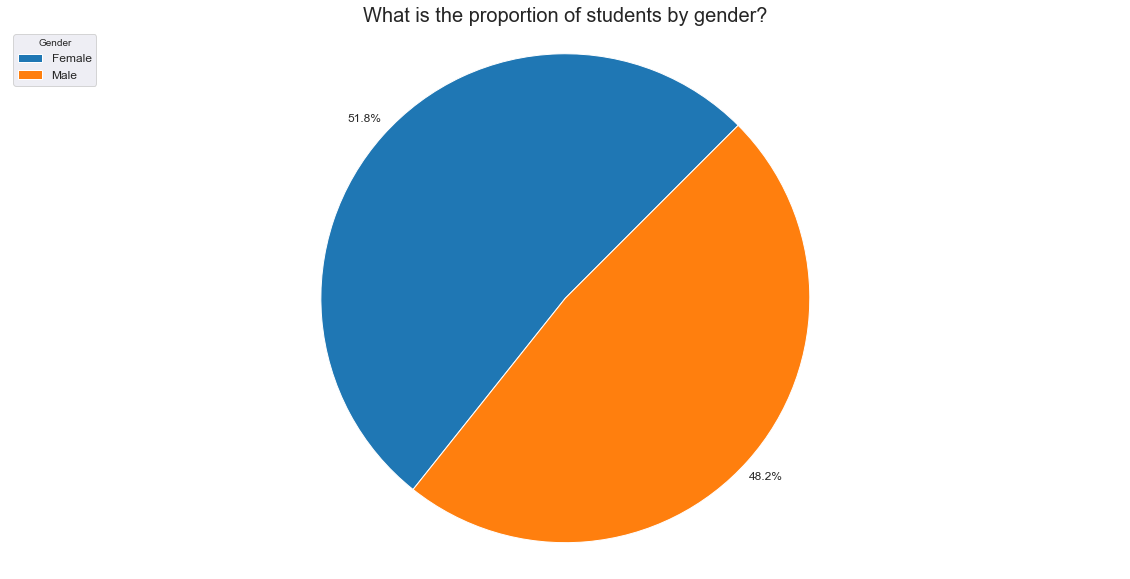

In [12]:
gender_counts = students_df["Gender"].value_counts()
ax = gender_counts.plot(kind='pie',
             figsize = (20,10),
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,         
             pctdistance=1.1,    
             textprops={'fontsize': 12})
ax.patch.set_facecolor('white')
plt.title('What is the proportion of students by gender?', size = 20)
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(labels=["Female", "Male"], loc="upper left", title="Gender", fontsize=12);

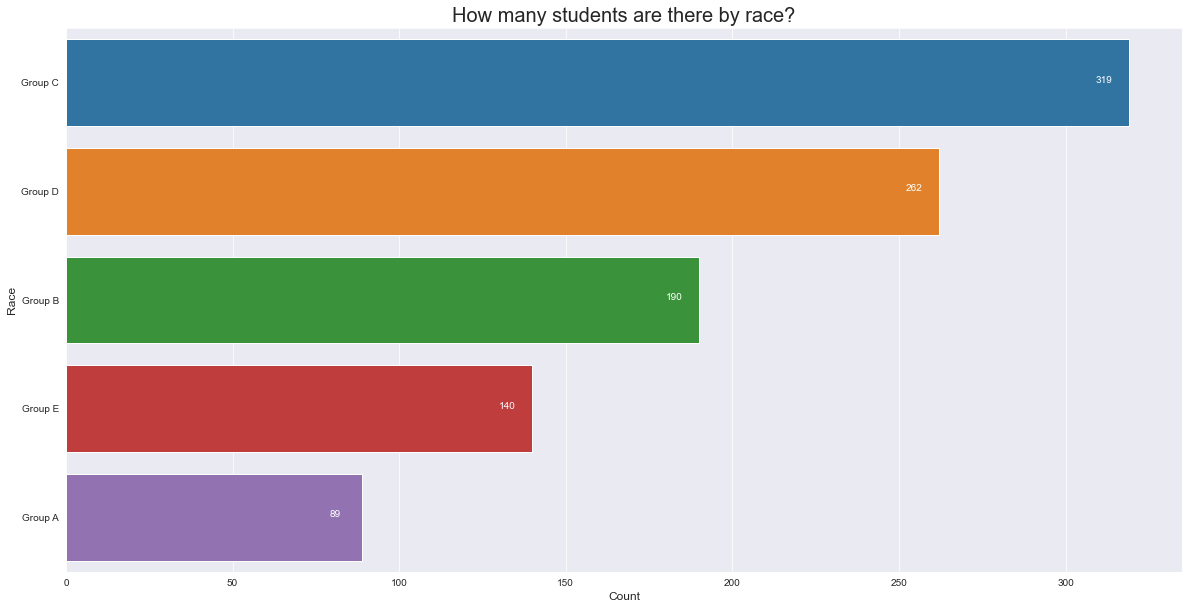

In [13]:
race_value_counts = students_df['Race'].value_counts()
plt.figure(figsize=(20,10))
ax = sns.barplot(x=race_value_counts.values, y=race_value_counts.index, orient='h')
ax.set_title("How many students are there by race?", size=20)
ax.set_xlabel(xlabel="Count", size=12)
ax.set_ylabel(ylabel="Race", size=12)

# Annotate value labels to each group
for index, value in enumerate(race_value_counts): 
    plt.annotate(value, xy=(value-10, index), color='white') 

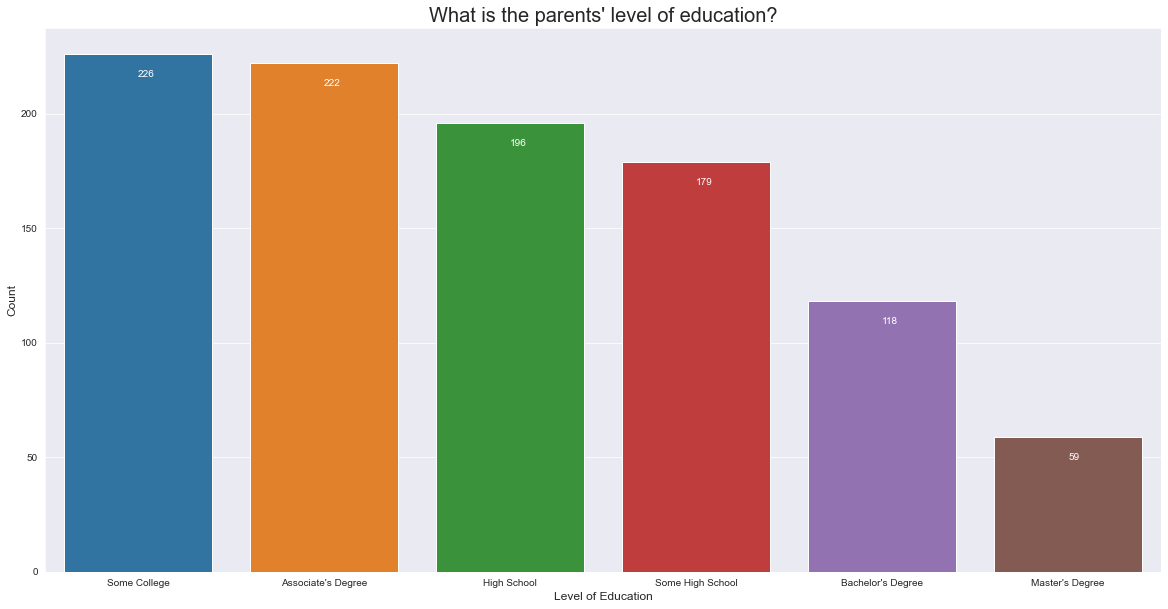

In [14]:
level_education_value_counts = students_df['Parental Level of Education'].value_counts()
plt.figure(figsize=(20,10))
ax = sns.barplot(x=level_education_value_counts.index, y=level_education_value_counts.values)
ax.set_title("What is the parents' level of education?", size=20)
ax.set_xlabel(xlabel="Level of Education", size=12)
ax.set_ylabel(ylabel="Count", size=12)

# Annotate value labels to each level
for index, value in enumerate(level_education_value_counts): 
    plt.annotate(value, xy=(index, value-10), color='white') 

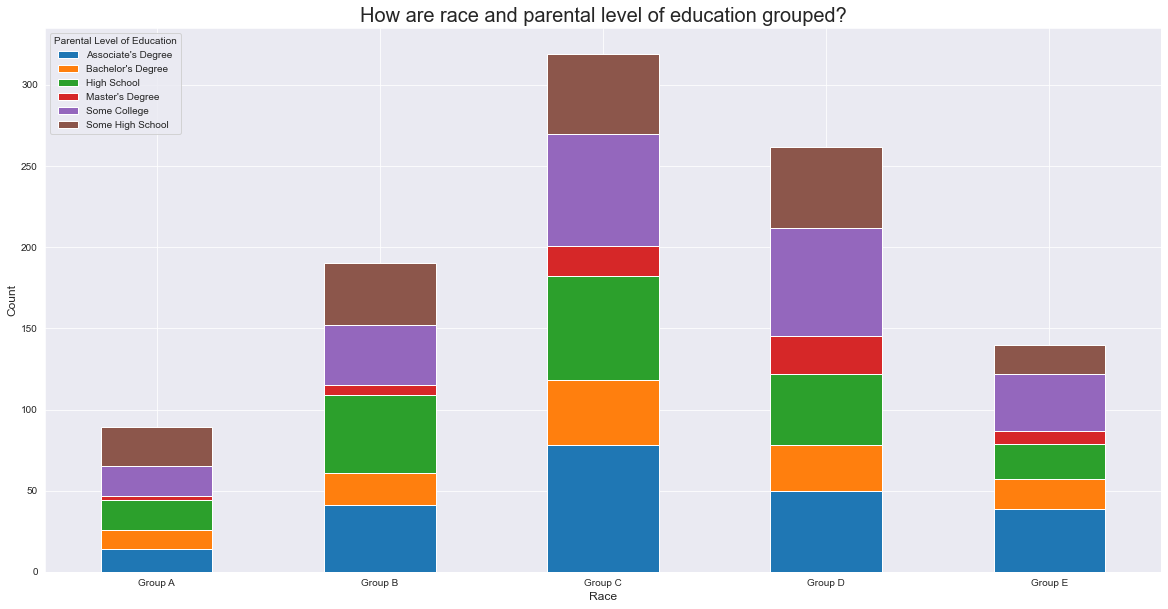

In [15]:
ax = pd.crosstab(students_df["Race"], [students_df["Parental Level of Education"]]).plot.bar(stacked=True, figsize=(20,10))
ax.set_title("How are race and parental level of education grouped?", size=20)
ax.set_xlabel(xlabel="Race", size=12)
ax.set_ylabel(ylabel="Count", size=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(loc="upper left", title="Parental Level of Education");

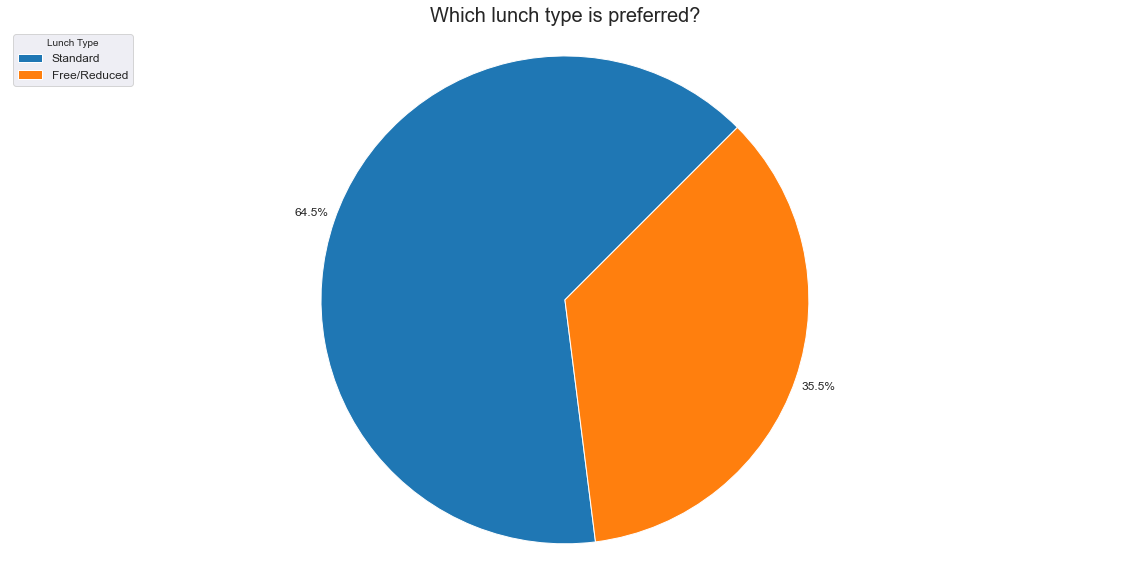

In [16]:
lunch_counts = students_df["Lunch"].value_counts()
ax = lunch_counts.plot(kind='pie',
             figsize = (20,10),
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,         
             pctdistance=1.1,    
             textprops={'fontsize': 12})
ax.patch.set_facecolor('white')
plt.title('Which lunch type is preferred?', size = 20)
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(loc="upper left", labels=["Standard", "Free/Reduced"], title="Lunch Type", fontsize=12);

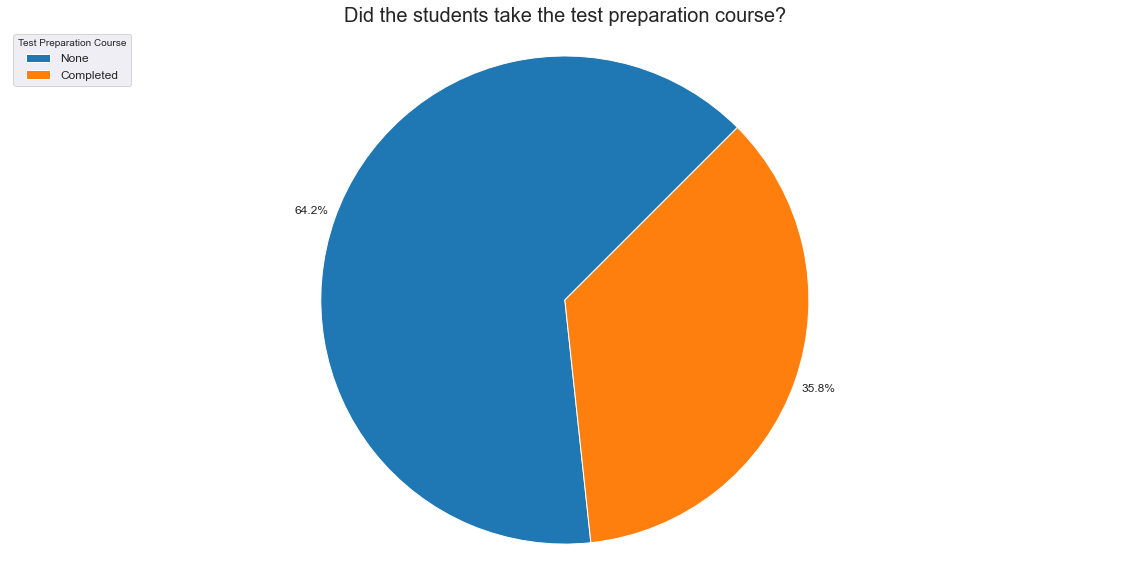

In [17]:
test_preparation_counts = students_df["Test Preparation Course"].value_counts()
ax = test_preparation_counts.plot(kind='pie',
             figsize = (20,10),
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,         
             pctdistance=1.1,    
             textprops={'fontsize': 12})
ax.patch.set_facecolor('white')
plt.title('Did the students take the test preparation course?', size = 20)
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(loc="upper left", labels=["None", "Completed"], title="Test Preparation Course", fontsize=12);

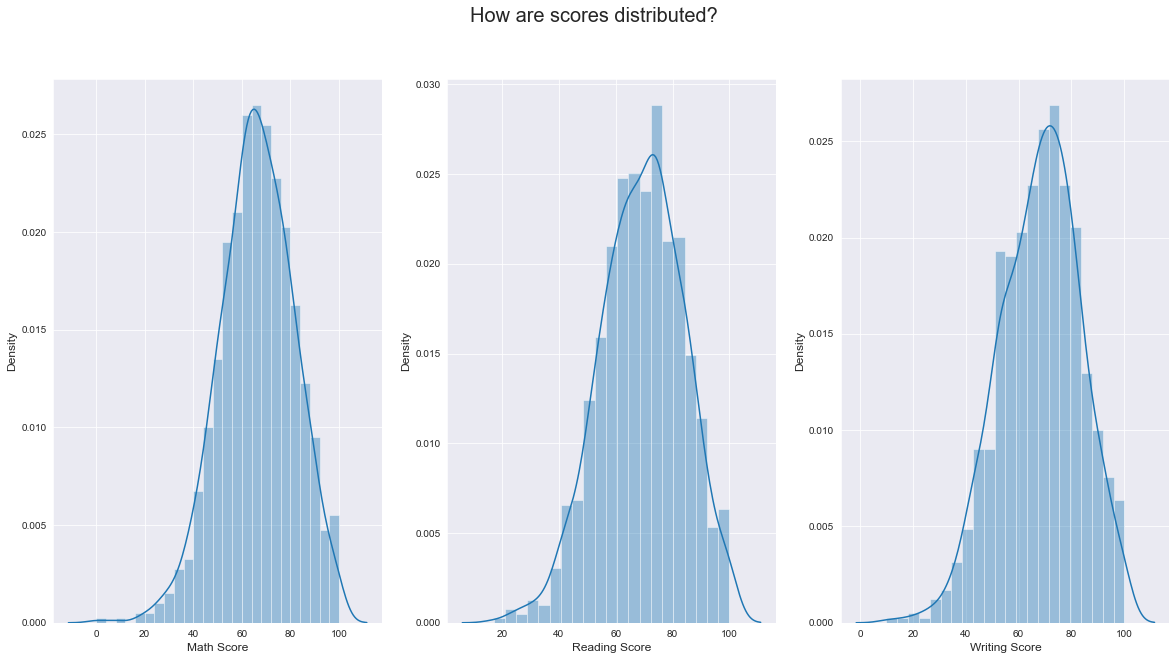

In [18]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in students_df[["Math Score", "Reading Score", "Writing Score"]].items():
    sns.distplot(value, ax=ax[index])
    ax[index].set_xlabel(xlabel=col, size=12)
    ax[index].set_ylabel(ylabel="Density", size=12)
    index += 1
    
fig.suptitle("How are scores distributed?", fontsize=20);

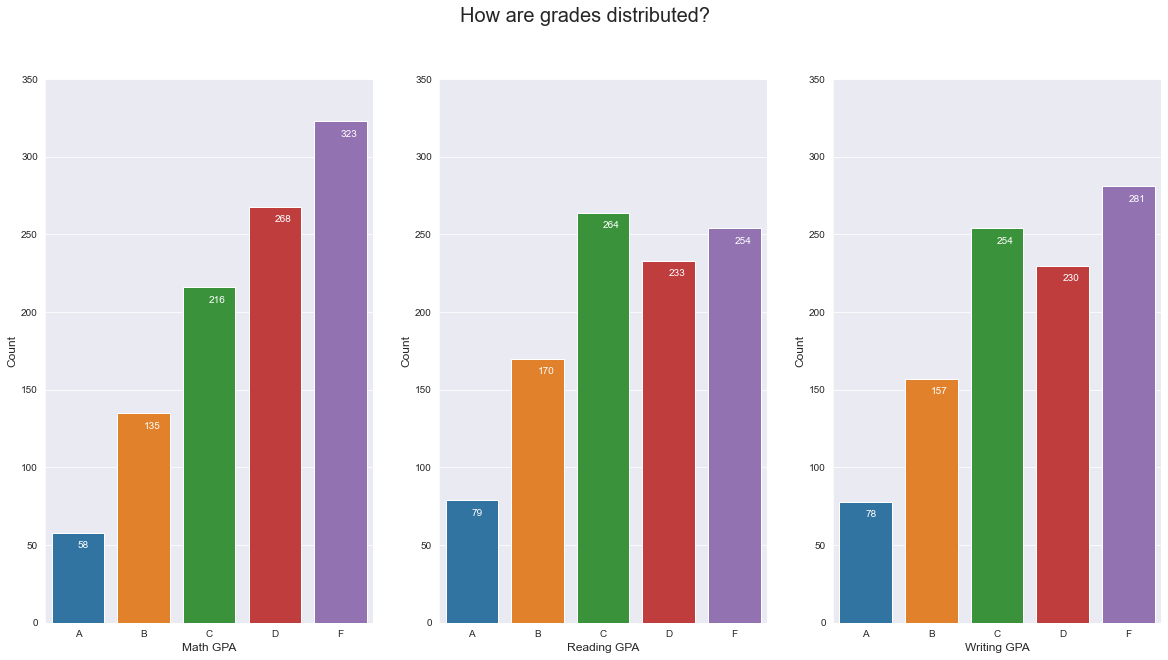

In [19]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in ["Math GPA", "Reading GPA", "Writing GPA"]:
    sns.countplot(students_df[col], ax=ax[index], order=['A', 'B', 'C', 'D', 'F'])
    ax[index].set_xlabel(xlabel=col, size=12)
    ax[index].set_ylabel(ylabel="Count", size=12)
    ax[index].set_ylim([0, 350])
    # Annotate value labels to each grade
    for i, value in enumerate(students_df[col].value_counts().sort_index()): 
        ax[index].annotate(value, xy=(i, value-10), color='white') 
    index += 1
    
fig.suptitle("How are grades distributed?", fontsize=20);

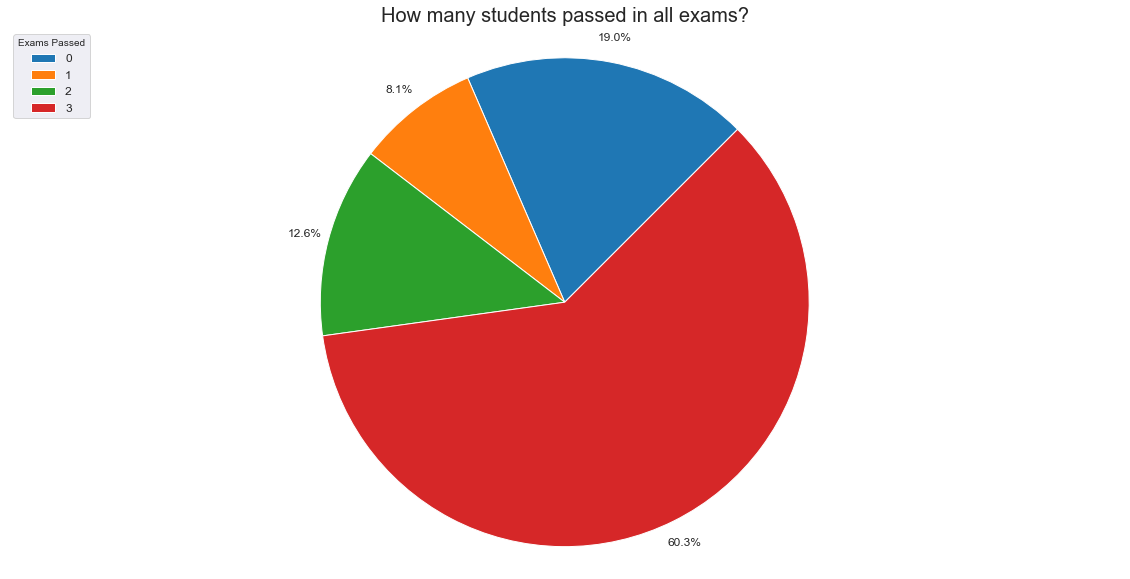

In [20]:
exams_passed_counts = students_df["Exams Passed"].value_counts().sort_index()
ax = exams_passed_counts.plot(kind='pie',
             figsize = (20,10),
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,         
             pctdistance=1.1,    
             textprops={'fontsize': 12})
ax.patch.set_facecolor('white')
plt.title('How many students passed in all exams?', size = 20)
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(loc="upper left", labels=[0, 1, 2, 3], title="Exams Passed", fontsize=12);

In [21]:
def plot_sunburst_chart(subject):
    plt.figure(figsize=(20, 10))
    gpa_counts = pd.crosstab(students_df[f"{subject} GPA"], students_df["Gender"])
    totals_labels = gpa_counts.index
    totals = gpa_counts.values.sum(axis=1)
    by_gender = gpa_counts.values.flatten()
    by_gender_labels = len(gpa_counts) * ["F", "M"]

    by_gender_colors = len(gpa_counts) * ['#ffb3e6', '#c2c2f0']
    explode = (0.3,0.3,0.3,0.3,0.3) 

    plt.pie(totals, 
            labels=totals_labels,
            autopct='%1.1f%%', 
            pctdistance=1.1,
            labeldistance=0.8,
            startangle=180,
            textprops={'fontsize': 14},
            radius=12)
    plt.pie(by_gender,
            labels=by_gender_labels,
            colors=by_gender_colors,
            autopct='%1.1f%%', 
            pctdistance=1.15,
            labeldistance=0.8,
            startangle=180,
            textprops={'fontsize': 14, 'color': 'white'},
            radius=7)

    centre_circle = plt.Circle((0,0), 5, color='black', fc='white',linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    plt.title(f'Which gender did better at {subject}?', fontsize=20)

    plt.axis('equal')
    plt.tight_layout()
    plt.show()

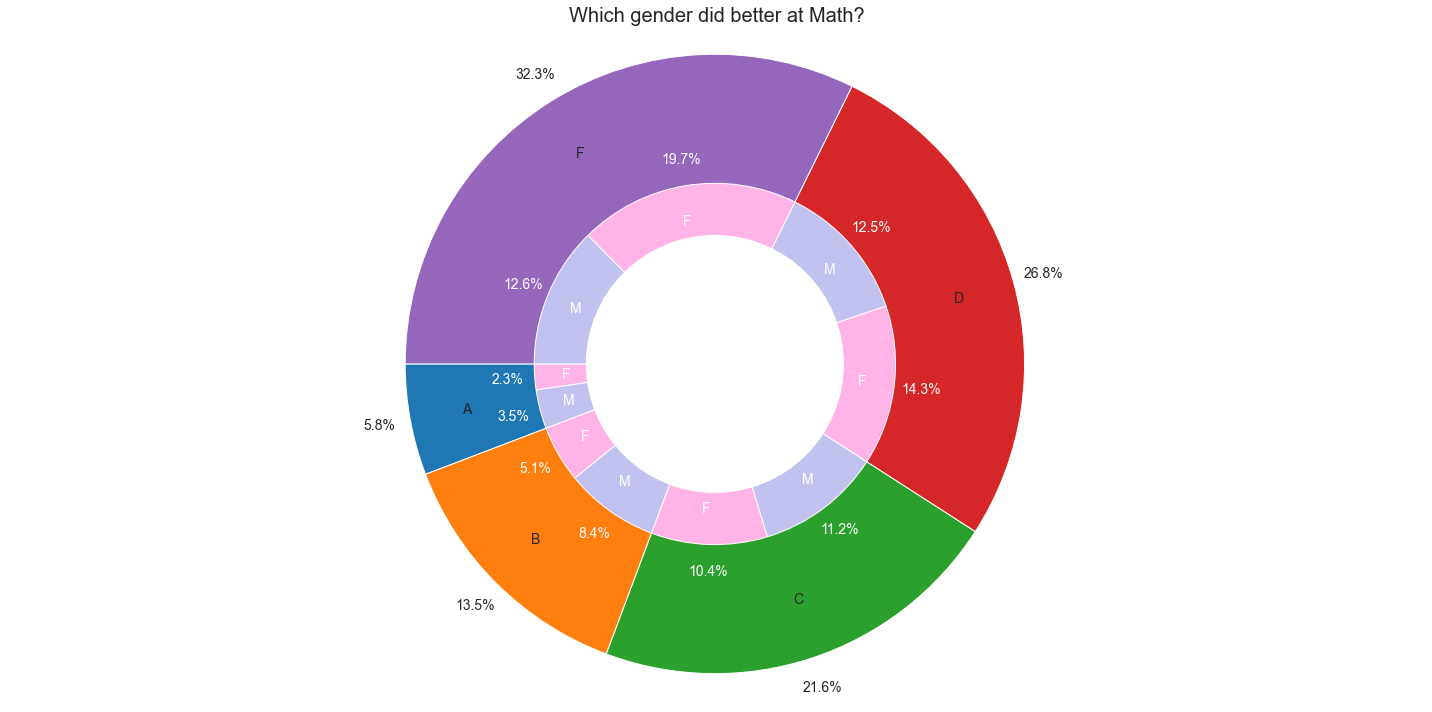

In [22]:
plot_sunburst_chart("Math")

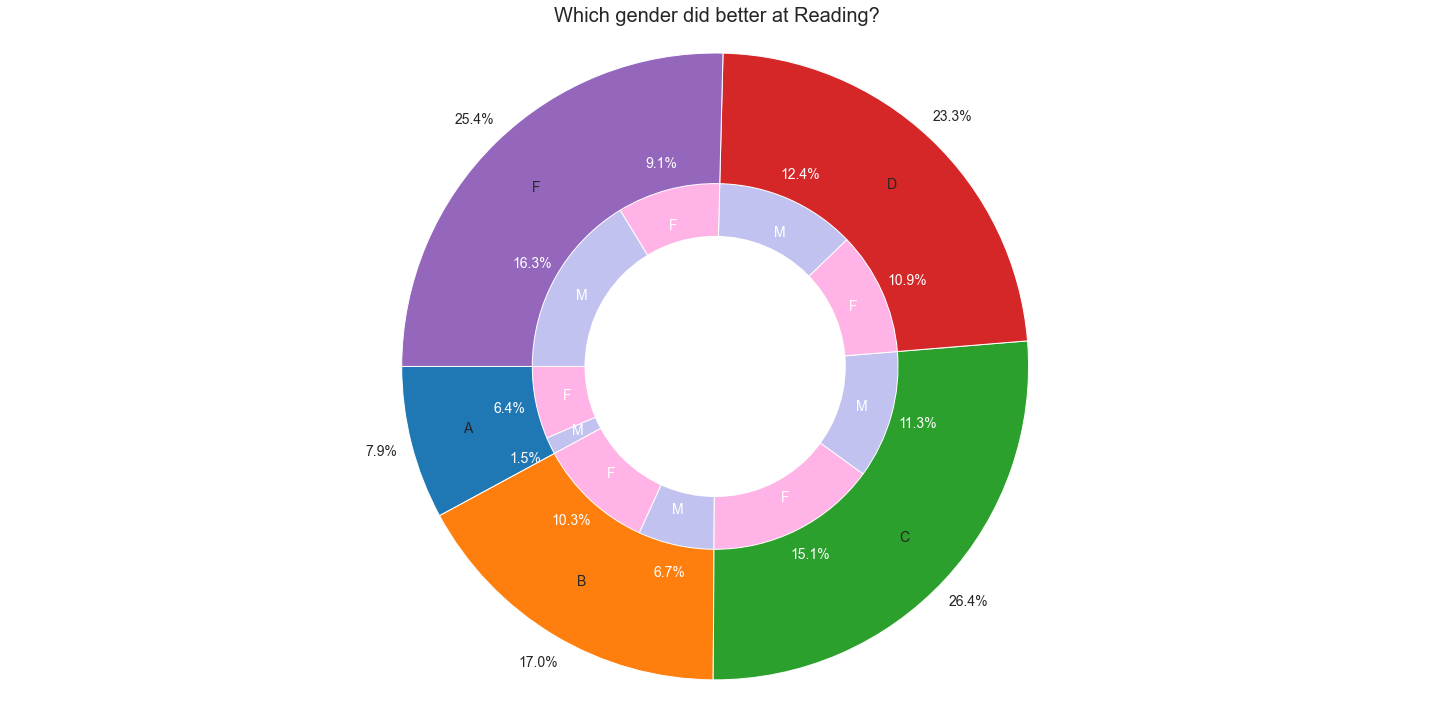

In [23]:
plot_sunburst_chart("Reading")

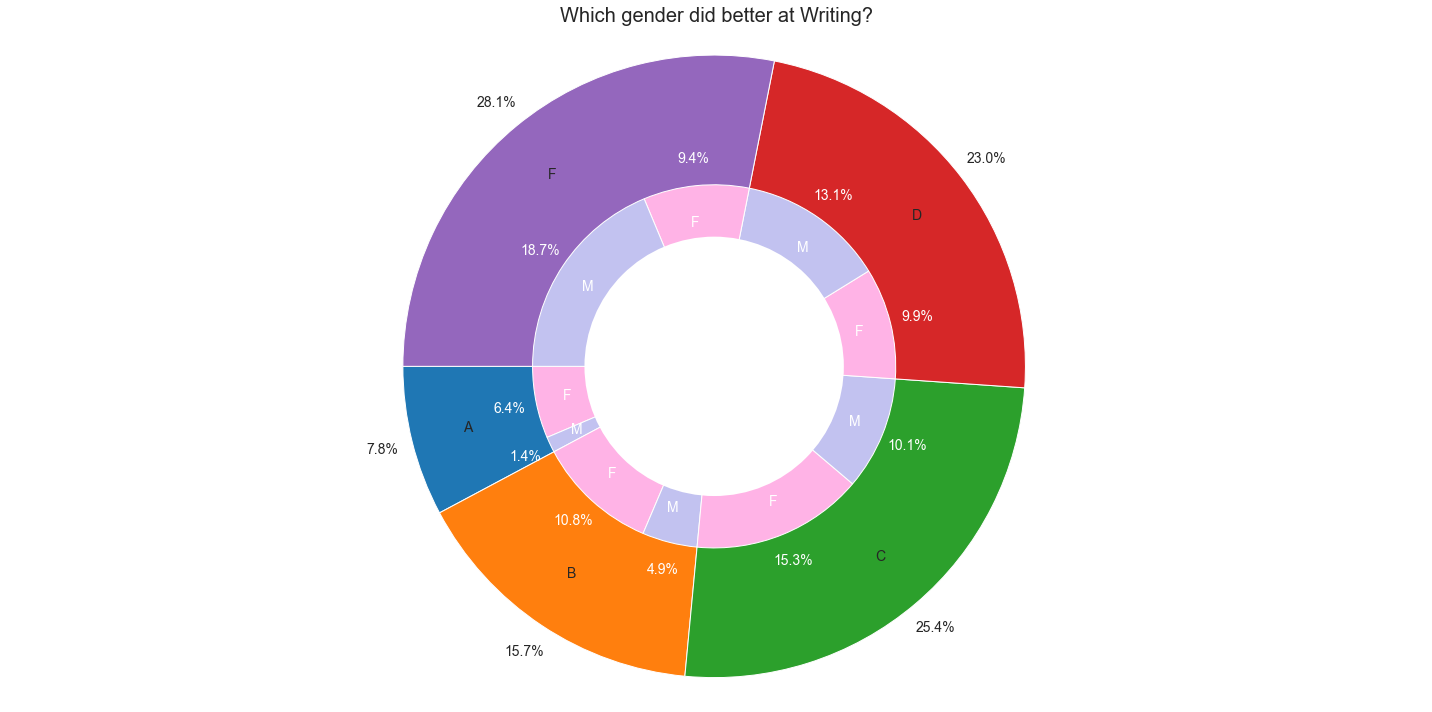

In [24]:
plot_sunburst_chart("Writing")

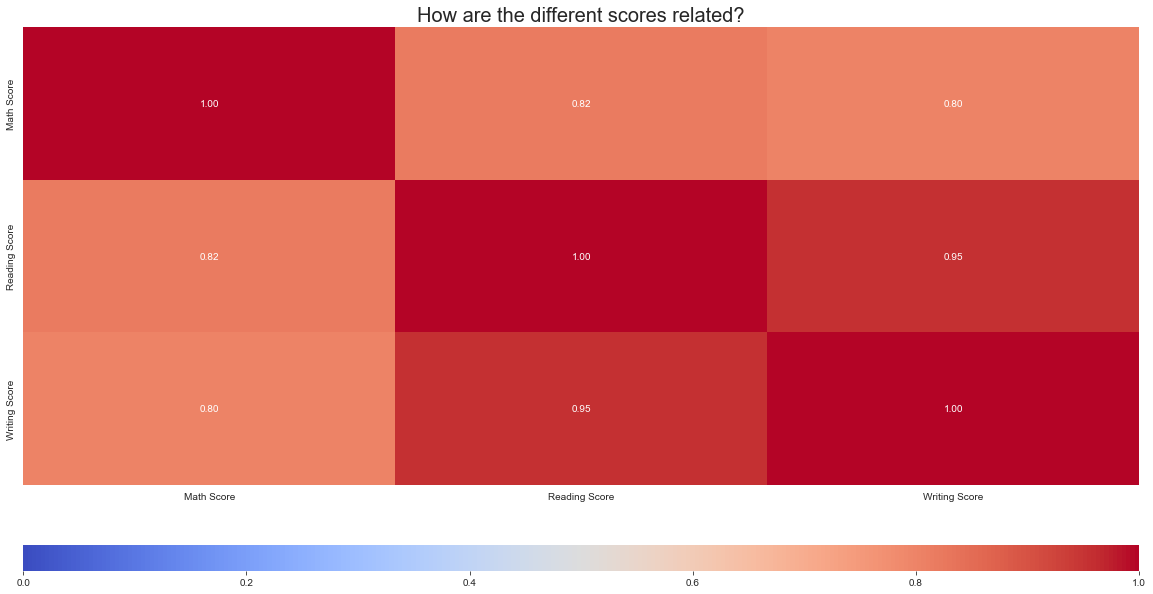

In [25]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .25}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(20,10))
sns.heatmap(students_df[["Math Score", "Reading Score", "Writing Score"]].corr(),
            annot= True,
            fmt = ".2f",
            vmin = 0,
            vmax = 1,
            ax=ax,
            cbar_ax=cbar_ax,
            cbar_kws={"orientation": "horizontal"},
            cmap='coolwarm')
ax.set_title('How are the different scores related?', size = 20);

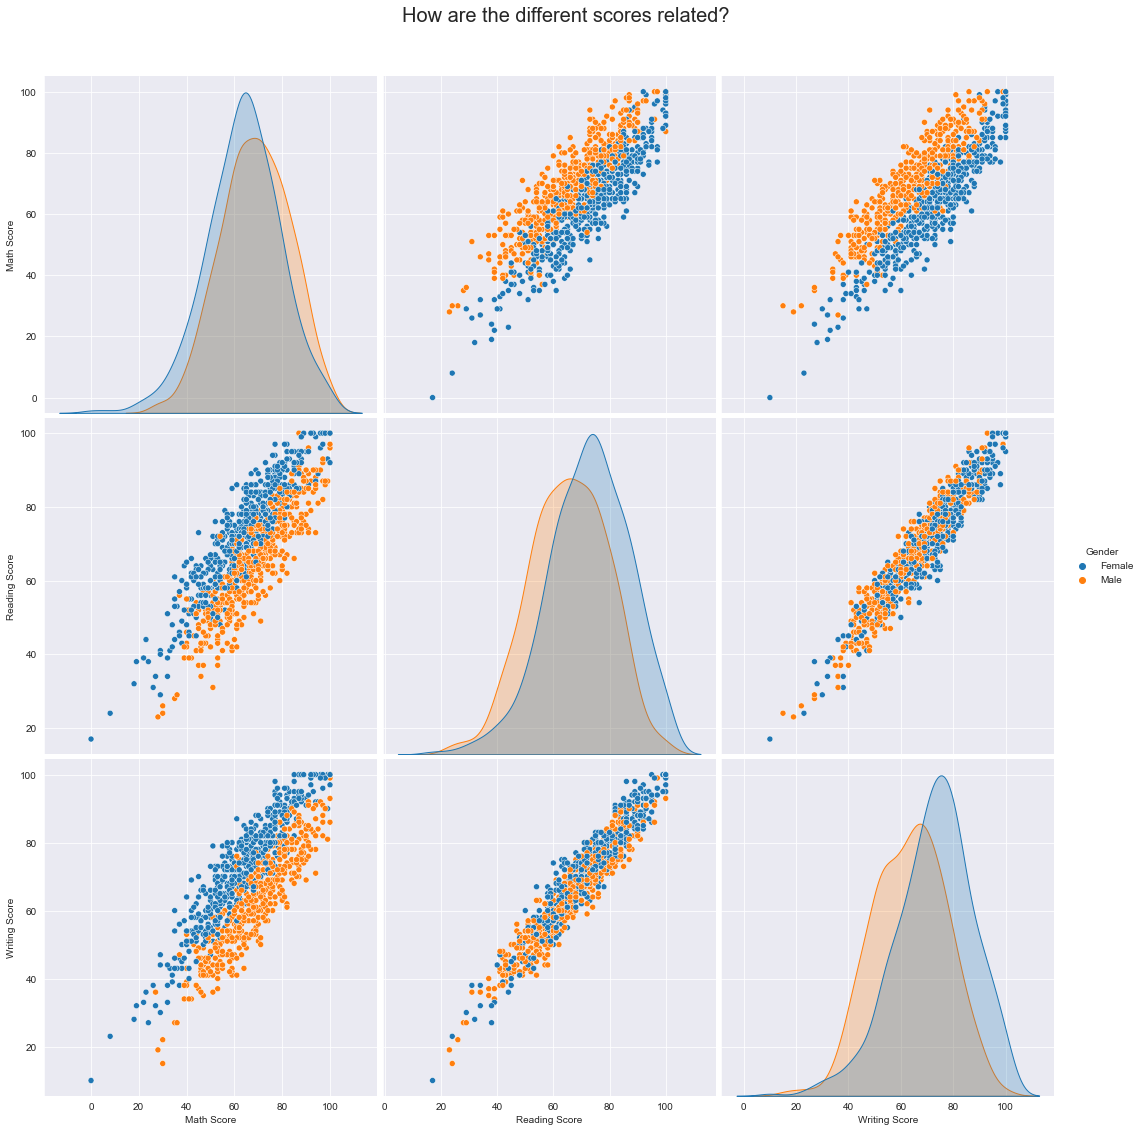

In [26]:
g = sns.pairplot(students_df[["Math Score", "Reading Score", "Writing Score", "Gender"]], hue="Gender", height=5);
g.fig.suptitle("How are the different scores related?", size=20, y=1.05);

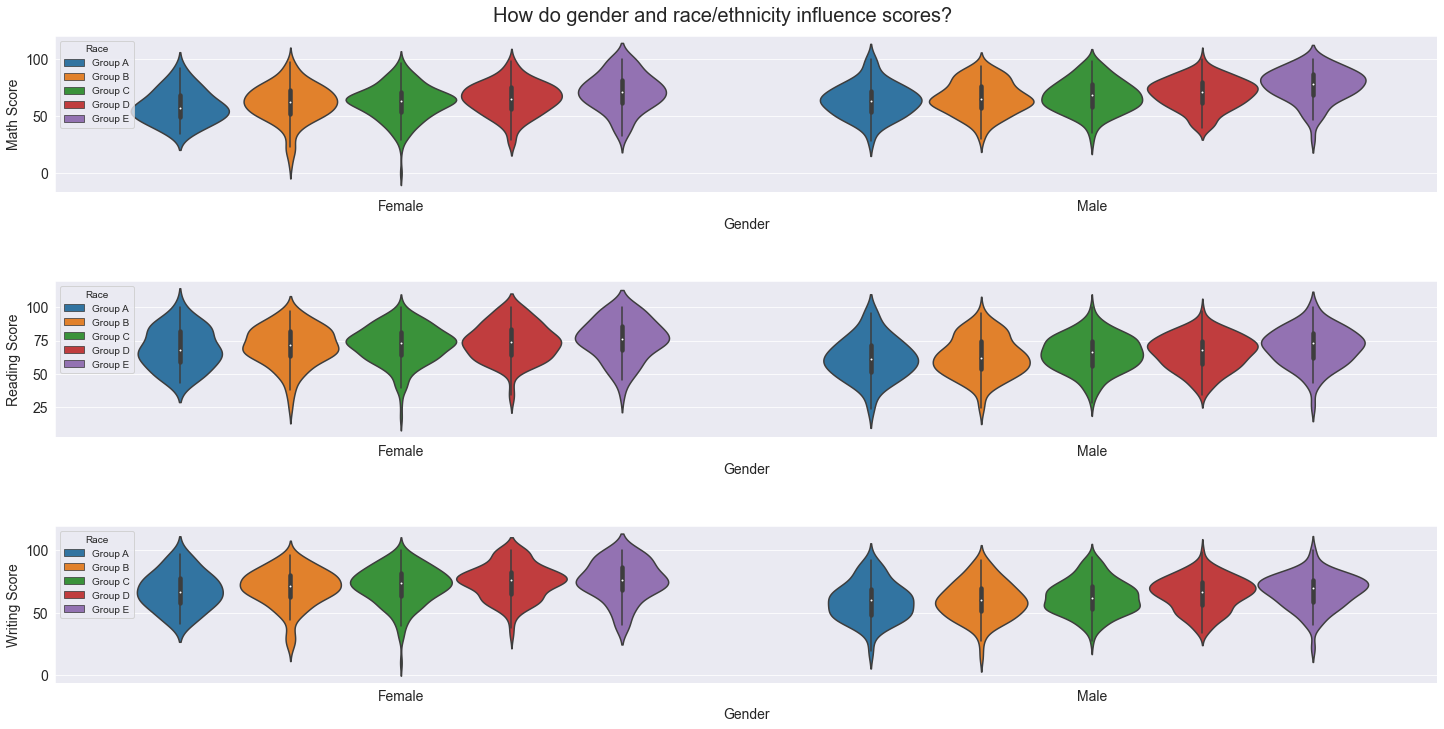

In [27]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20,10))
ax = ax.flatten()

for index, col in enumerate(["Math Score", "Reading Score", "Writing Score"]):
    sns.violinplot(x="Gender", y=col, hue="Race", data=students_df, ax=ax[index], hue_order=["Group A", "Group B", "Group C", "Group D", "Group E"])
    ax[index].set_xlabel("Gender", fontsize=14)
    ax[index].set_ylabel(col.title(), fontsize = 14)
    ax[index].xaxis.set_tick_params(labelsize=14)
    ax[index].yaxis.set_tick_params(labelsize=14)
    ax[index].legend(loc="upper left", title="Race")
    
fig.suptitle("How do gender and race/ethnicity influence scores?", fontsize=20, y=1)
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

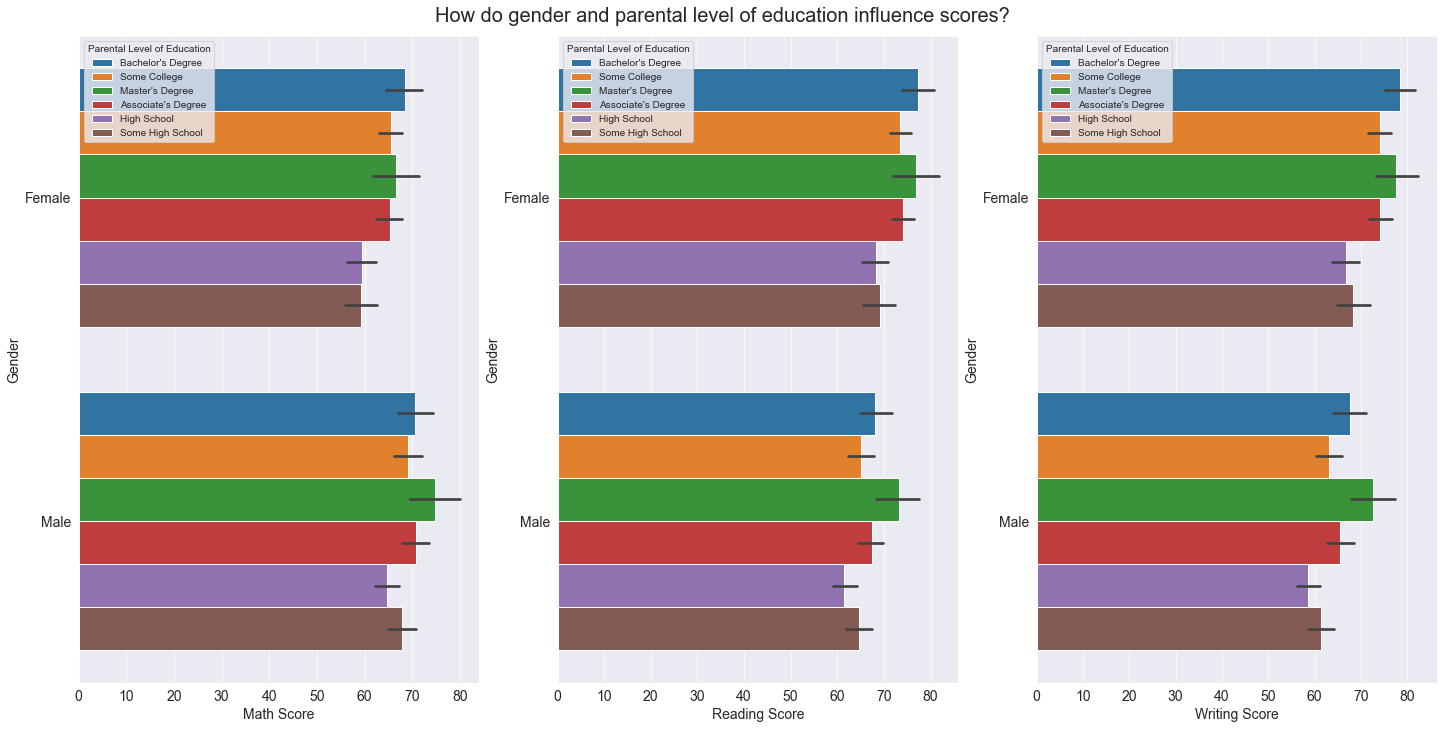

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
ax = ax.flatten()

for index, col in enumerate(["Math Score", "Reading Score", "Writing Score"]):
    sns.barplot(x=col, y="Gender", hue="Parental Level of Education", data=students_df, ax=ax[index])
    ax[index].set_xlabel(col, fontsize = 14)
    ax[index].set_ylabel("Gender", fontsize=14)
    ax[index].xaxis.set_tick_params(labelsize=14)
    ax[index].yaxis.set_tick_params(labelsize=14)

fig.suptitle("How do gender and parental level of education influence scores?", fontsize=20, y=1)
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

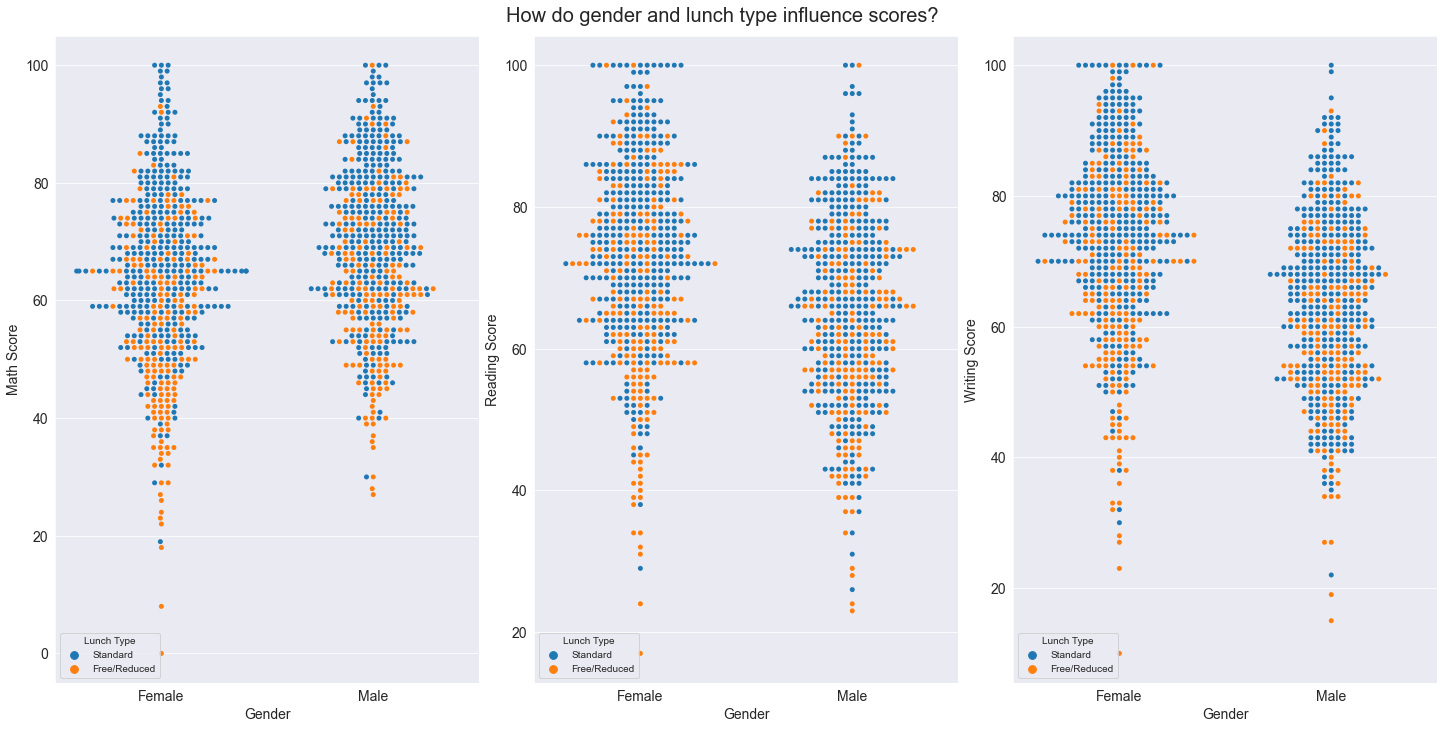

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
ax = ax.flatten()

for index, col in enumerate(["Math Score", "Reading Score", "Writing Score"]):
    sns.swarmplot(x="Gender", y=col, hue="Lunch", data=students_df, ax=ax[index])
    ax[index].set_xlabel("Gender", fontsize = 14)
    ax[index].set_ylabel(col, fontsize = 14)
    ax[index].xaxis.set_tick_params(labelsize=14)
    ax[index].yaxis.set_tick_params(labelsize=14)
    ax[index].legend(loc="lower left", title="Lunch Type")
    
fig.suptitle("How do gender and lunch type influence scores?", fontsize=20, y=1)
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

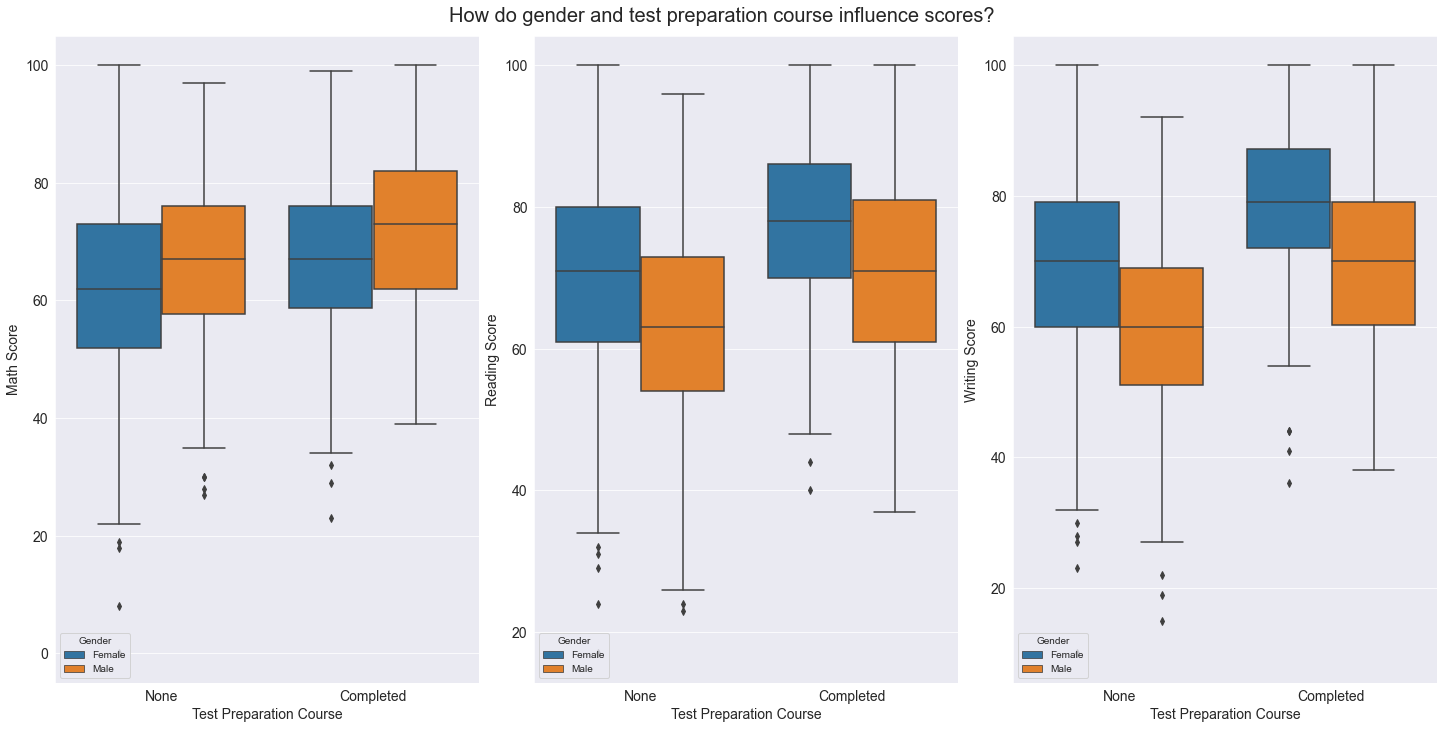

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
ax = ax.flatten()

for index, col in enumerate(["Math Score", "Reading Score", "Writing Score"]):
    sns.boxplot(x=students_df['Test Preparation Course'],y=students_df[col], hue=students_df['Gender'], ax=ax[index])
    ax[index].set_xlabel("Test Preparation Course", fontsize = 14)
    ax[index].set_ylabel(col, fontsize = 14)
    ax[index].xaxis.set_tick_params(labelsize=14)
    ax[index].yaxis.set_tick_params(labelsize=14)
    ax[index].legend(loc="lower left", title="Gender")
    
fig.suptitle("How do gender and test preparation course influence scores?", fontsize=20, y=1)
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)